In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import voxart

name 'Design' is not defined
Module load first time 
False


In [4]:
voxart.Masks(1)

foo4


In [22]:
import copy
for k, v in copy.copy(globals()).items():
    print(k, v)

__name__ __main__
__doc__ Automatically created module for IPython interactive environment
__package__ None
__loader__ None
__spec__ None
__builtin__ <module 'builtins' (built-in)>
__builtins__ <module 'builtins' (built-in)>
_ih ['', "get_ipython().run_line_magic('load_ext', 'autoreload')\nget_ipython().run_line_magic('autoreload', '2')", 'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\nimport voxart', 'voxart.Masks(2)', 'voxart.Masks(2)', 'dir(voxart)', 'voxart.Masks(2)', 'voxart.__dir__', 'voxart.__dir__()', 'voxart.Masks(2)', 'voxart.Masks(2)', 'voxart.Masks()', 'voxart.Masks(1)', 'global()', 'globals()', 'voxart.Masks(1)', 'voxart.Masks(1)', 'voxart.Masks(1)', 'type(globals())', 'for k, v in globals().items():\n    print(k, v)', 'for k, v in copy.copy(globals().items()):\n    print(k, v)', 'import copy\nfor k, v in copy.copy(globals().items()):\n    print(k, v)', 'import copy\nfor k, v in copy.copy(globals()).items():\n    print(k, v)']
_oh {3: <voxart.s

In [3]:
test_vox2 = voxart.Design.from_size(7)
for i in [0, 6]:
    test_vox2.vox[i, 0, :] = 1
    test_vox2.vox[i, 6, :] = 1
    test_vox2.vox[i, :, 0] = 1
    test_vox2.vox[i, :, 6] = 1
for i in [6]:
    test_vox2.vox[0, i, :] = 1
    test_vox2.vox[6, i, :] = 1
    test_vox2.vox[:, i, 0] = 1
    test_vox2.vox[:, i, 6] = 1
display(test_vox2.vox.sum())
test_vox2._vox

58

array([[[1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],


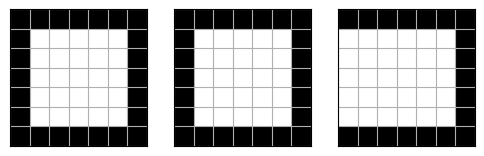

In [4]:
test_vox2.projections_fig()

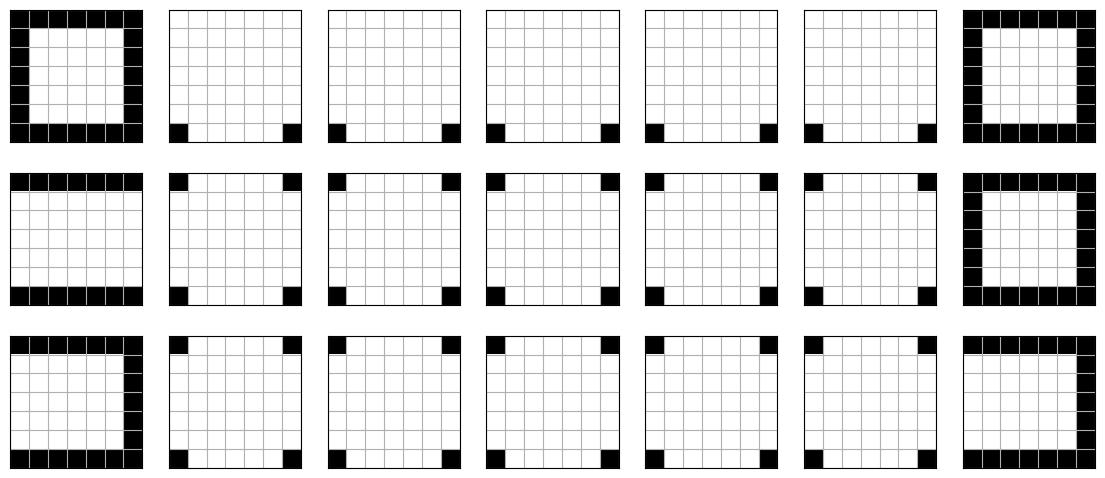

In [5]:
test_vox2.slices_fig()

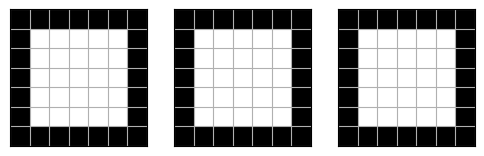

In [6]:
g = voxart.Goal.from_size(7)
g.add_frame()
g.fig()

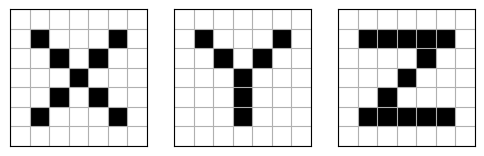

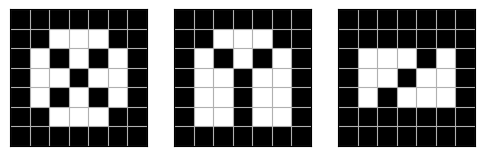

In [7]:
test_goal = voxart.Goal.from_arrays(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
)
display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())

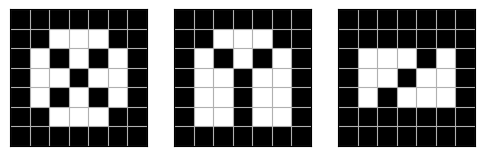

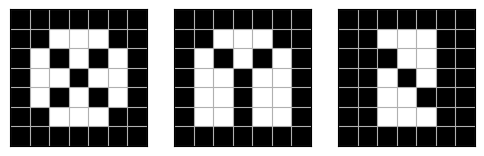

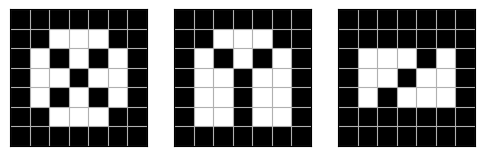

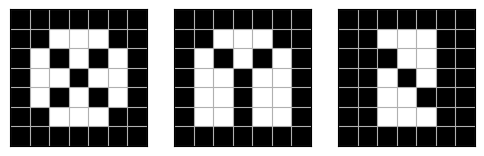

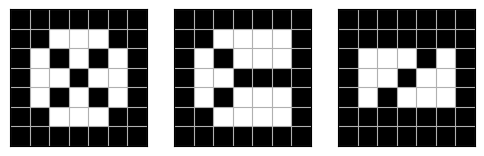

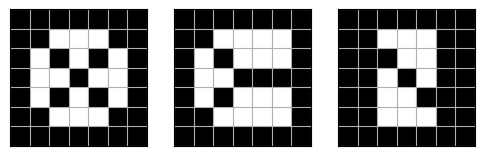

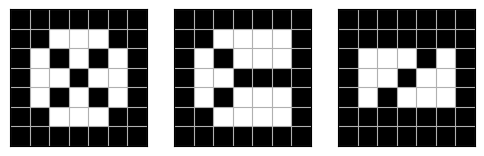

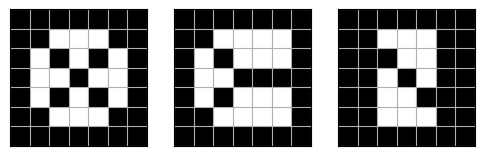

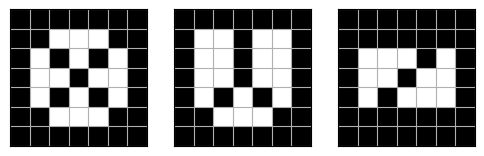

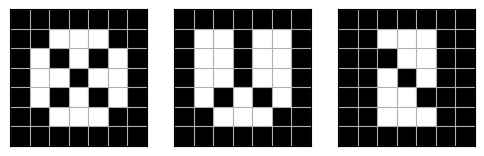

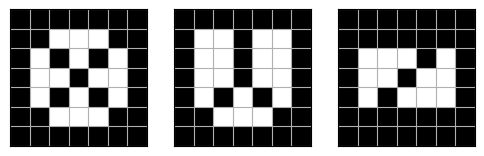

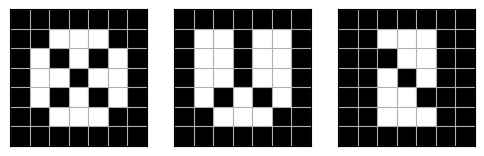

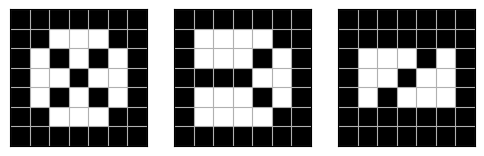

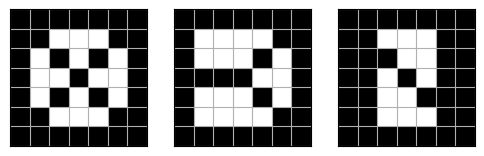

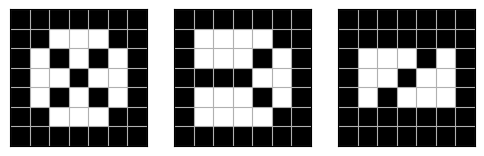

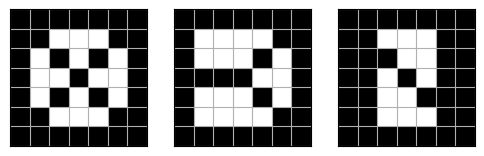

In [8]:
for g in test_goal.rotations():
    display(g.fig())

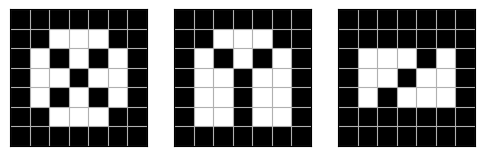

134

In [9]:
design = test_goal.create_base_design()
display(design.projections_fig())
display(design.vox.sum())

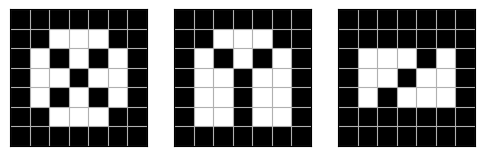

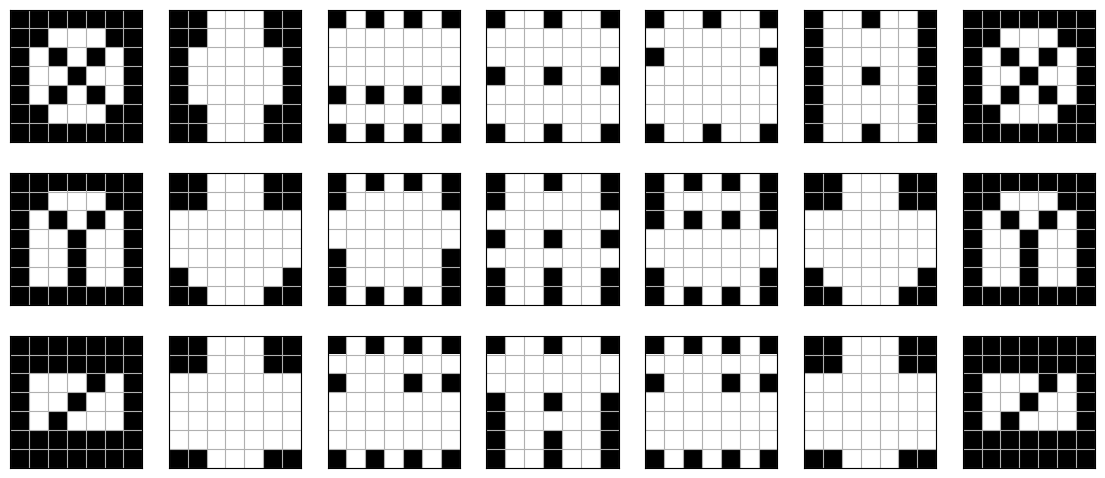

In [10]:
y, z = np.where(test_goal._goals[0] == 0)
design.vox[:, y, z] = 0
x, z = np.where(test_goal._goals[1] == 0)
design.vox[x, :, z] = 0
x, y = np.where(test_goal._goals[2] == 0)
design.vox[x, y, :] = 0
display(design.projections_fig())
display(design.slices_fig())

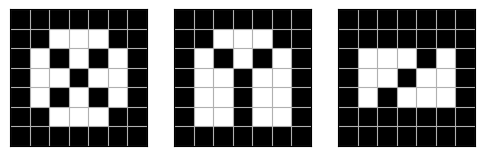

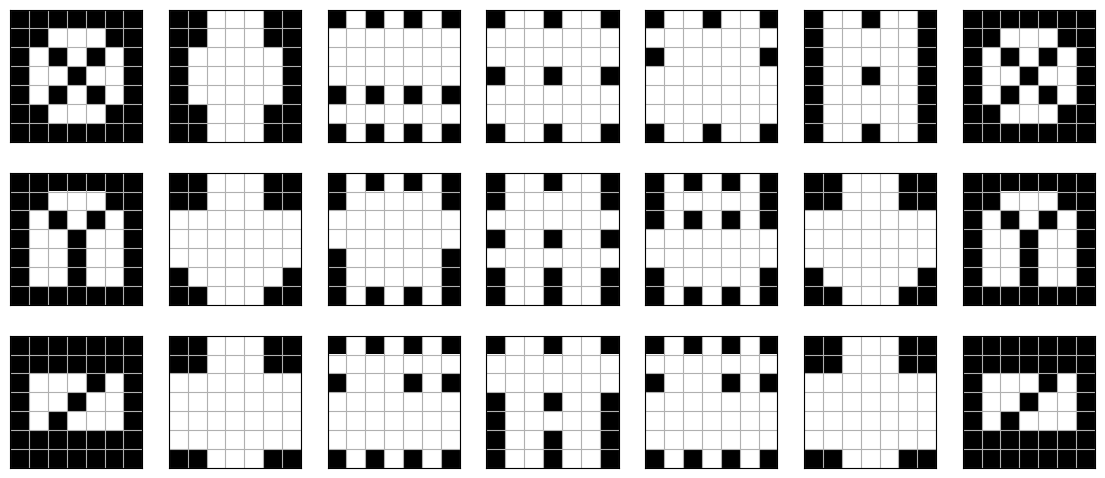

134

In [11]:
design2 = test_goal.create_base_design()
display(design2.projections_fig())
display(design2.slices_fig())
display(design2.vox.sum())

In [12]:
voxart.Masks(4)

## find_removable

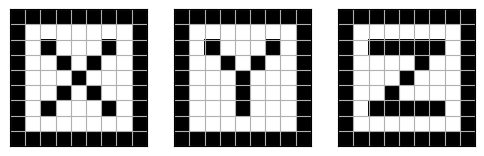

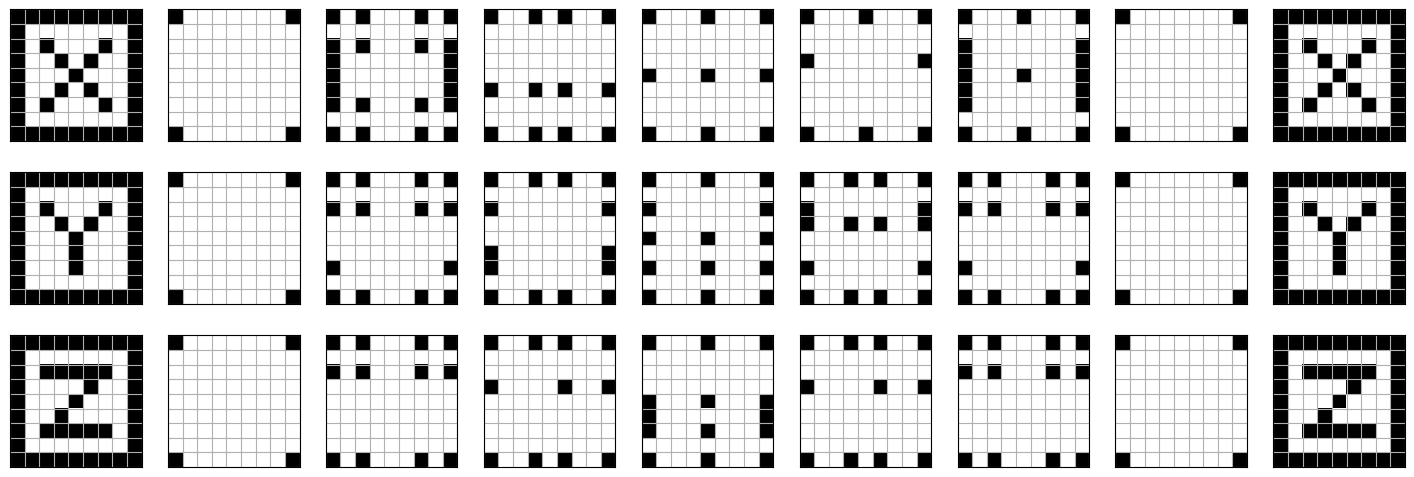

In [6]:
test_goal = voxart.Goal.from_arrays(
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 0, 0, 0, 1, 0,],
     [0, 0, 1, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 1, 0, 0,],
     [0, 0, 0, 1, 0, 0, 0,],
     [0, 0, 1, 0, 0, 0, 0,],
     [0, 1, 1, 1, 1, 1, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0)
)
#display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())
design = test_goal.create_base_design()
display(design.slices_fig())

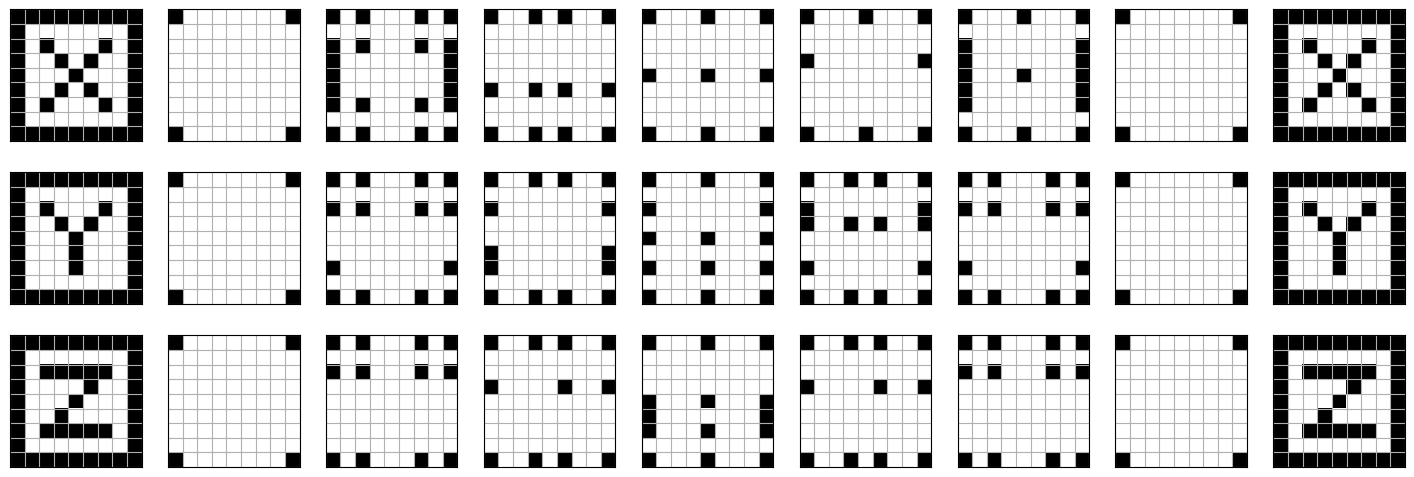

In [14]:
voxart.Design(design.find_removable_slow()).slices_fig()

## Search

Starting objective value: 153.0
Starting goal form 0
Starting goal form 1
Starting goal form 2
Starting goal form 3
Starting goal form 4
Starting goal form 5
Starting goal form 6
Starting goal form 7
Starting goal form 8
Starting goal form 9
Starting goal form 10
Starting goal form 11
Starting goal form 12
Starting goal form 13
Starting goal form 14
Starting goal form 15


(array([  8.,  31., 114., 153., 505., 338., 175., 213.,  58.,   5.]),
 array([26.5, 31.1, 35.7, 40.3, 44.9, 49.5, 54.1, 58.7, 63.3, 67.9, 72.5]),
 <BarContainer object of 10 artists>)

Value: 26.5


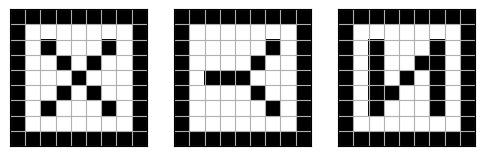

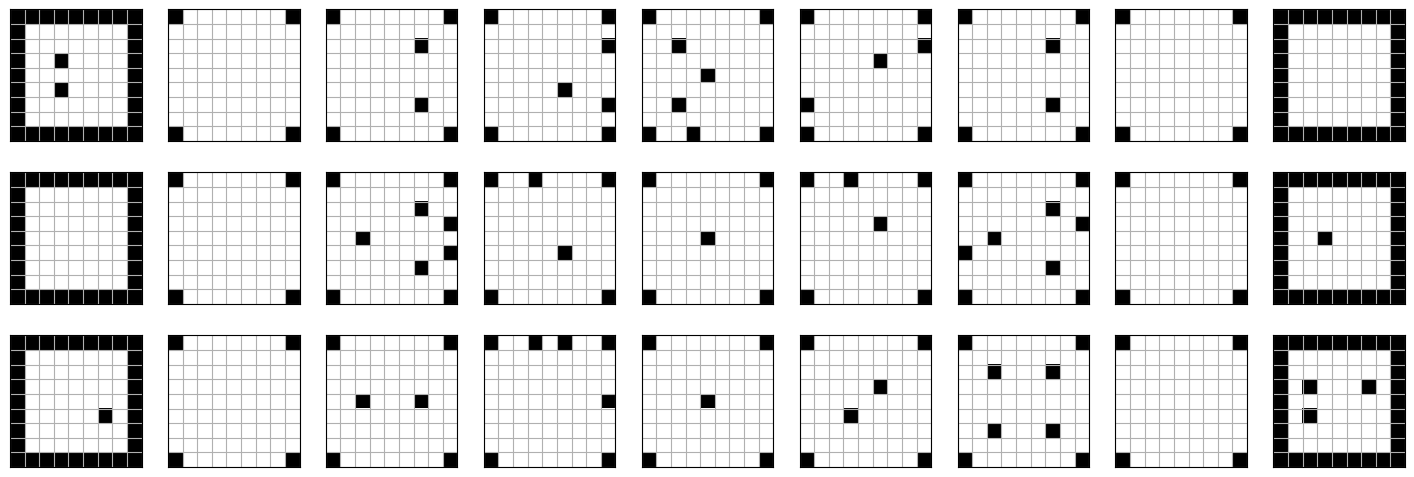

Value: 28.0


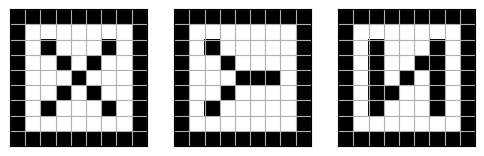

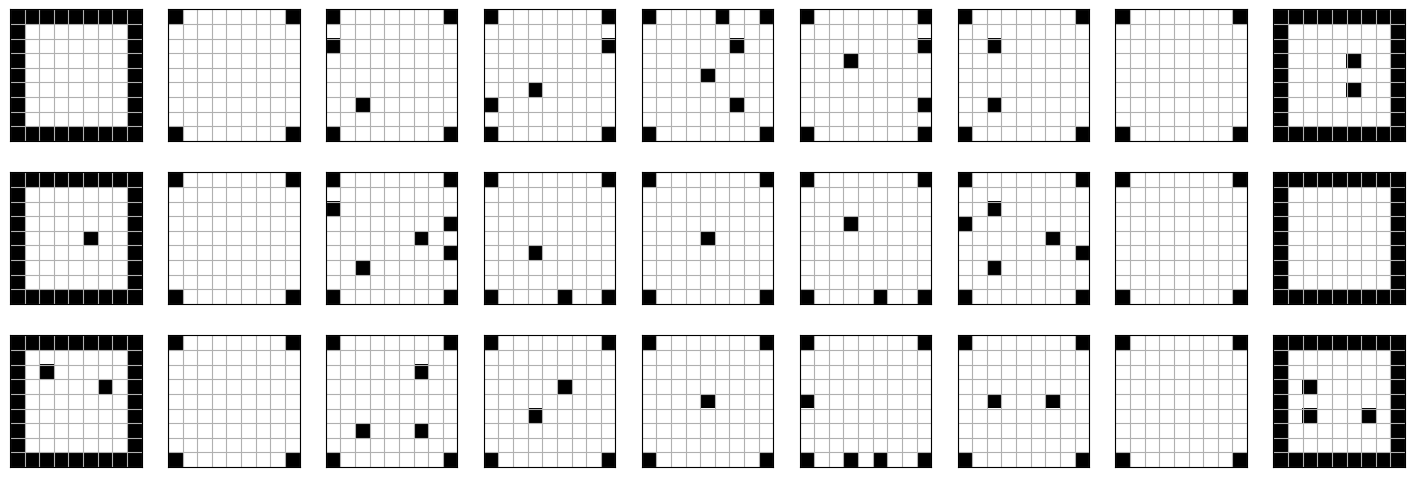

Value: 28.0


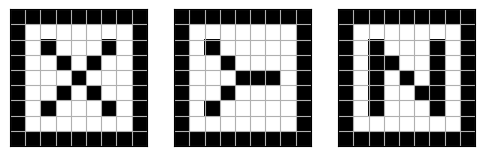

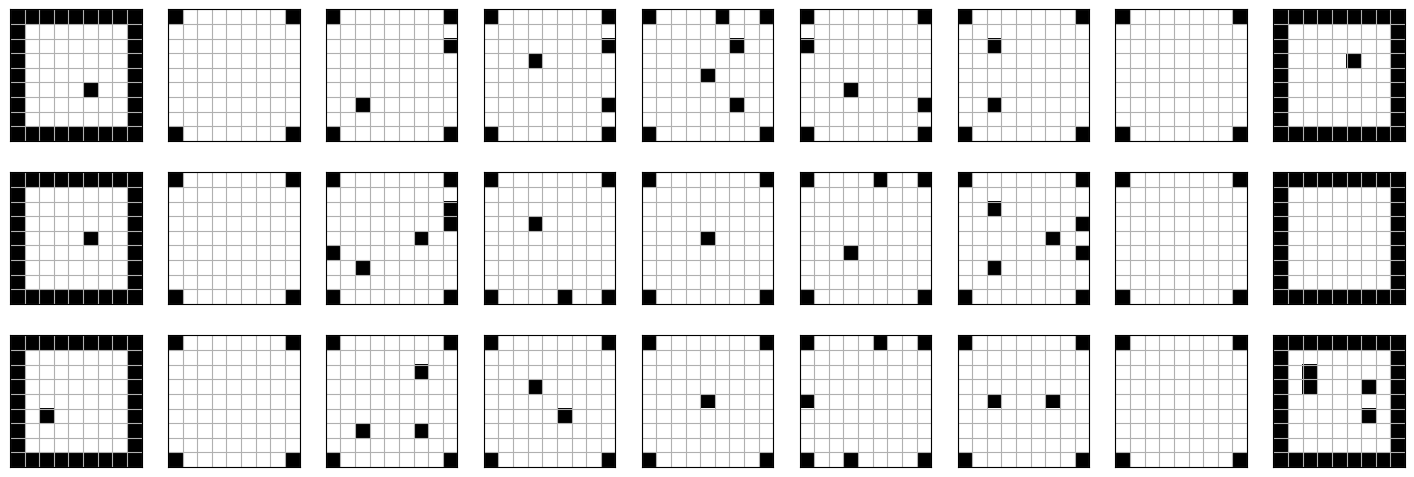

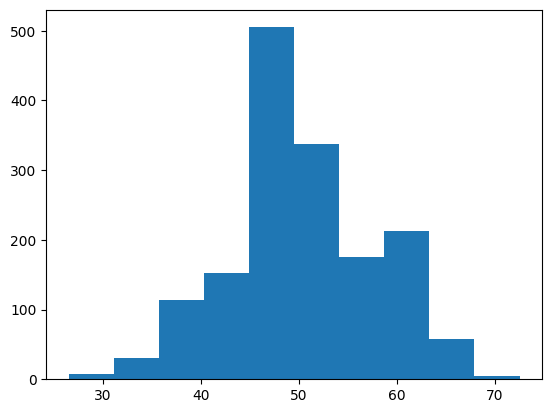

In [29]:
base_design = test_goal.create_base_design()
masks = voxart.Masks(base_design.size)
print("Starting objective value:", voxart.objective_value(base_design, masks))
results = voxart.search(test_goal, "random", 100, 3)
display(plt.hist(results.all_objective_values()))
for design in results.best():
    print("Value:", voxart.objective_value(design, masks))
    display(design.projections_fig())
    display(design.slices_fig())

Starting objective value: 153.0
Starting goal form 0
Starting goal form 1
Starting goal form 2
Starting goal form 3
Starting goal form 4
Starting goal form 5
Starting goal form 6
Starting goal form 7
Starting goal form 8
Starting goal form 9
Starting goal form 10
Starting goal form 11
Starting goal form 12
Starting goal form 13
Starting goal form 14
Starting goal form 15


(array([40.,  0.,  0.,  0.,  0.,  0., 40.,  0., 40., 40.]),
 array([26.5, 27.8, 29.1, 30.4, 31.7, 33. , 34.3, 35.6, 36.9, 38.2, 39.5]),
 <BarContainer object of 10 artists>)

Value: 26.5


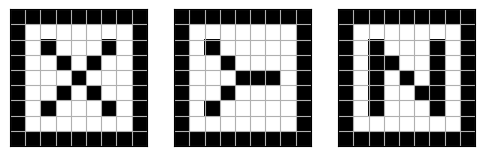

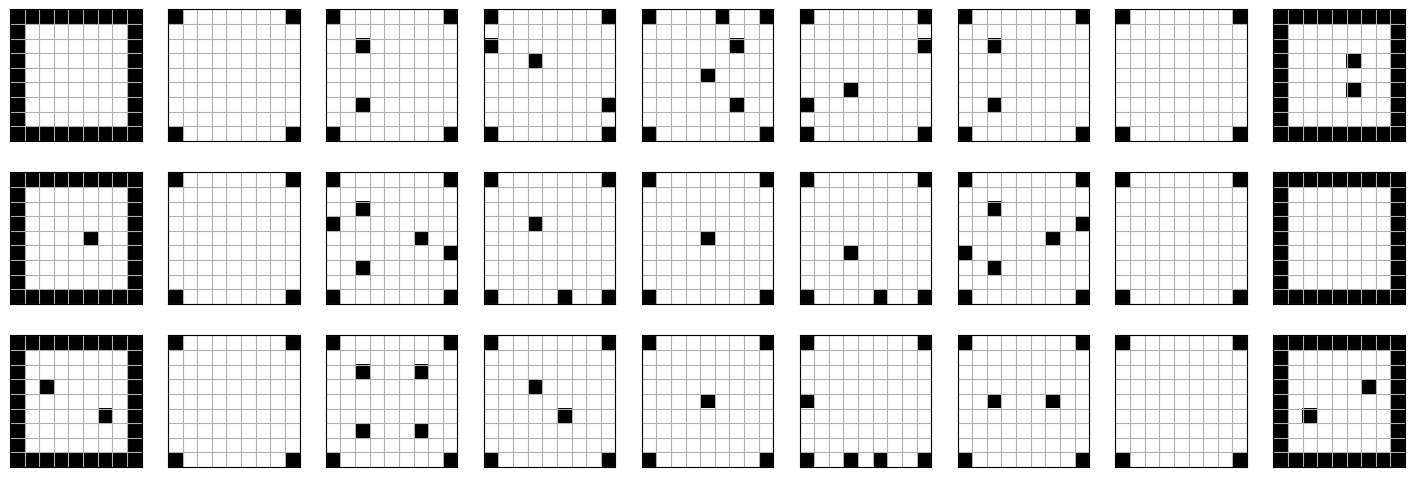

Value: 26.5


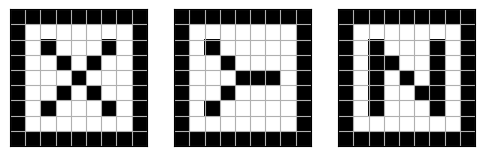

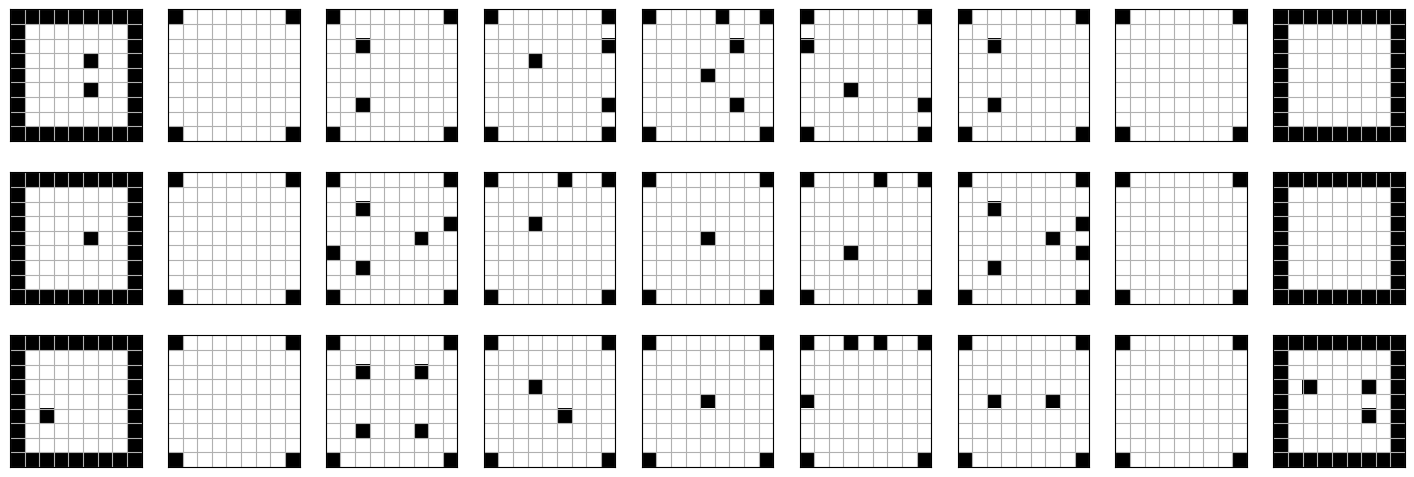

Value: 26.5


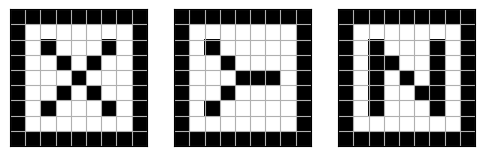

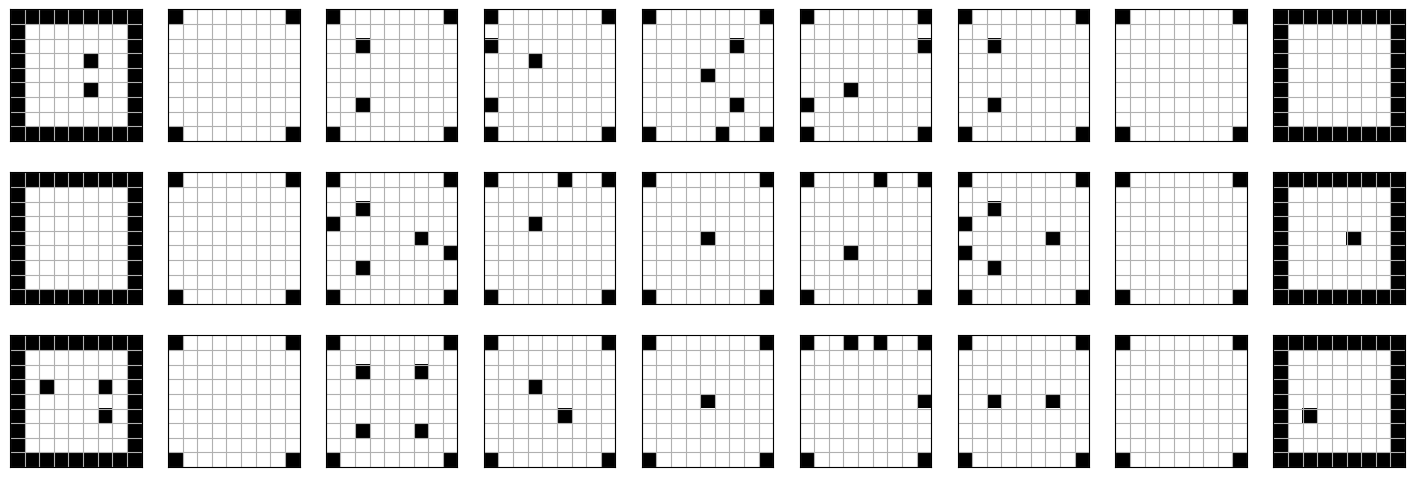

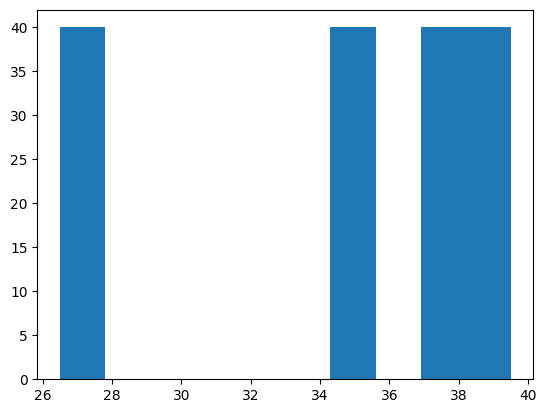

In [28]:
base_design = test_goal.create_base_design()
masks = voxart.Masks(base_design.size)
print("Starting objective value:", voxart.objective_value(base_design, masks))
results = voxart.search(test_goal, "random_face_first", 10, 20)
display(plt.hist(results.all_objective_values()))
for design in results.best():
    print("Value:", voxart.objective_value(design, masks))
    display(design.projections_fig())
    display(design.slices_fig())

In [17]:
dir(voxart)

['Callable',
 'Design',
 'Goal',
 'Iterator',
 'Masks',
 'Optional',
 'SearchResults',
 'SearchResultsEntry',
 'SearchStrategy',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'annotations',
 'copy',
 'dataclass',
 'enum',
 'field',
 'functools',
 'heapq',
 'itertools',
 'np',
 'objective_value',
 'pd',
 'plt',
 'search']

In [18]:
%reload_ext autoreload

In [19]:
%pdb 0

Automatic pdb calling has been turned OFF


## Looking at equality operations

In [21]:
goal0 = voxart.Goal.from_arrays([[1, 1], [0, 0]],
                                [[1, 0], [0, 0]],
                                [[0, 1], [0, 0]])
goal1 = voxart.Goal.from_arrays([[1, 1], [0, 0]],
                                [[1, 0], [0, 0]],
                                [[0, 1], [0, 0]])
goal2 = voxart.Goal.from_arrays([[1, 1], [1, 1]],
                                [[1, 0], [1, 1]],
                                [[0, 1], [1, 1]])
goal3 = voxart.Goal.from_arrays(np.pad([[1]], 2, constant_values=0),
                                np.pad([[1]], 2, constant_values=0),
                                np.pad([[1]], 2, constant_values=0))
display(goal0 == goal1)
display(goal0 == goal2)
display(goal1 == goal2)
display(goal0 == goal3)

True

False

False

False

In [22]:
goal0._goals == goal3._goals

/var/folders/06/hmgfyb_d5076hlrrhyncy5vc0000gq/T/ipykernel_62647/2463477595.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  goal0._goals == goal3._goals


False

In [24]:
set([goal0, goal1, goal2, goal3])

TypeError: unhashable type: 'Goal'

In [26]:
hash(goal0._goals.data.tobytes())

2096551961257740828

## Making a faster find_removable

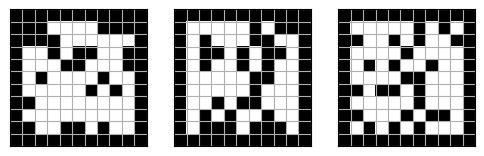

In [33]:
rng = np.random.default_rng()
goal_for_timing = voxart.Goal.from_arrays(
    rng.choice(a=[0, 1], p=[0.7, 0.3], size=(11, 11)),
    rng.choice(a=[0, 1], p=[0.7, 0.3], size=(11, 11)),
    rng.choice(a=[0, 1], p=[0.7, 0.3], size=(11, 11)))
goal_for_timing.add_frame()
design_for_timing = goal_for_timing.create_base_design()
design_for_timing.projections_fig()
    

In [34]:
%timeit design_for_timing.find_removable_slow()

3.65 ms ± 90.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
